In [1]:
#load csv data of varying terpene content with water status in Rosemary plants
dat <- read.csv('waterterpenestatusRosmarinus.csv')

In [2]:
# install.packages("dplyr", repos = "http://cran.us.r-project.org")

In [3]:
library('dplyr')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
dat

,Waterstatus,terpenecontent
1,adequate,15.3
2,adequate,17.1
3,adequate,14.6
4,inadequate,10.8
5,inadequate,14.3
6,inadequate,12.1
7,inadequate,15.3
8,inadequate,9.8
9,adequate,18.5
10,adequate,13.9


In [5]:
#There are two types of water statuses so we want to filter for only adequate
adequate <- filter(dat,Waterstatus=="adequate")
head(adequate)

,Waterstatus,terpenecontent
1,adequate,15.3
2,adequate,17.1
3,adequate,14.6
4,adequate,18.5
5,adequate,13.9
6,adequate,16.2


In [6]:
#select adequate values but only include terpene content
adevals <- select(adequate, terpenecontent)
head(adevals)

,terpenecontent
1,15.3
2,17.1
3,14.6
4,18.5
5,13.9
6,16.2


In [7]:
#how to do everything in-line, %>% is for piping functions and filters
adeVals <- filter(dat, Waterstatus=="adequate") %>% select(terpenecontent)
head(adeVals)

,terpenecontent
1,15.3
2,17.1
3,14.6
4,18.5
5,13.9
6,16.2


In [8]:
class(dat)
class(chowVals)

[1] "data.frame"

ERROR: Error in eval(expr, envir, enclos): object 'chowVals' not found


In [9]:
#to return the result as a vector, unlist turns dataframes into vectors
adeVals <- filter(dat, Waterstatus=="adequate") %>% select(terpenecontent) %>% unlist
class(adeVals)
head(adeVals)

[1] "numeric"

terpenecontent1 terpenecontent2 terpenecontent3 terpenecontent4 terpenecontent5 
           15.3            17.1            14.6            18.5            13.9 
terpenecontent6 
           16.2

In [10]:
#can also do this
adeVals <- dat[ dat$Waterstatus=="adequate", colnames(dat)=="terpenecount"]
adeVals

""
1
2
3
9
10
11
15
16
17


# Inference

In [11]:
#How do we look at variability?  
#averages
control <- filter(dat,Waterstatus=='inadequate') %>% select(terpenecontent) %>% unlist
treatment <- filter(dat,Waterstatus=='adequate') %>% select(terpenecontent) %>% unlist
print(mean(treatment))

[1] 16.02222


In [12]:
print(mean(control))

[1] 12.48889


In [13]:
obsdiff <- mean(treatment) - mean(control)
print(obsdiff)

[1] 3.533333


In [14]:
population <- read.csv('inadequate.csv')
#turn into numeric operator
population <- unlist(population)

In [15]:
#sample 12 plants, and compare average
control <-sample(population,12)
mean(control)

[1] 12.075

## test null hypothesis with p-value calculation


In [16]:
#12 control plants (adequately watered)
control <- sample(population, 12)
#12 more control plants that'll we treat as inadequately watered
treatment <- sample(population, 12)
print(mean(treatment) - mean(control))

[1] 0.7083333


In [17]:
#Test the mean difference 10,000 times, Null distribution
n <- 10000
null <- vector('numeric',n)
for (i in 1:n) {
    control <- sample(population,12)
    treatment <- sample(population, 12)
    null[i] <- mean(treatment)-mean(control)
}

(mean(null >= obsdiff))

[1] 0

In [18]:
#.0001 is p-value

In [19]:
p<-pnorm(obsdiff,mean(null),sd(null))
1 - p

[1] 3.059873e-05

In [20]:
#.00003

In [21]:
install.packages('devtools', repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/Nick/Anaconda3/Lib/site-packages/rpy2/R/win-library/3.2'
(as 'lib' is unspecified)


package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nick\AppData\Local\Temp\RtmpWSrE9K\downloaded_packages


In [22]:
library(devtools)

In [23]:
dir <- system.file(package='dagdata')
list.files(dir)

[1] "data"        "DESCRIPTION" "extdata"     "help"        "html"       
[6] "Meta"        "NAMESPACE"   "script"

In [24]:
list.files(file.path(dir,'extdata'))

[1] "admissions.csv"               "astronomicalunit.csv"        
[3] "babies.txt"                   "femaleControlsPopulation.csv"
[5] "femaleMiceWeights.csv"        "mice_pheno.csv"              
[7] "msleep_ggplot2.csv"           "README"                      
[9] "spider_wolff_gorb_2013.csv"

In [25]:
filename <- 'femalemiceweights.csv'
dat <- read.csv(filename)
head(dat)

,Diet,Bodyweight
1,chow,21.51
2,chow,28.14
3,chow,24.04
4,chow,23.45
5,chow,23.68
6,chow,19.79


In [26]:
library(dplyr)
chow <- filter(dat,Diet=='chow')
head(chow)

,Diet,Bodyweight
1,chow,21.51
2,chow,28.14
3,chow,24.04
4,chow,23.45
5,chow,23.68
6,chow,19.79


In [27]:
chowVals <- select(chow,Bodyweight)
head(chowVals)

,Bodyweight
1,21.51
2,28.14
3,24.04
4,23.45
5,23.68
6,19.79


In [28]:
chowVals <- filter(dat,Diet=='chow') %>% select(Bodyweight)
class(dat)

[1] "data.frame"

In [29]:
class(chowVals)

[1] "data.frame"

In [30]:
chowVals <- filter(dat,Diet=='chow') %>% select(Bodyweight) %>% unlist
head(chowVals)

Bodyweight1 Bodyweight2 Bodyweight3 Bodyweight4 Bodyweight5 Bodyweight6 
      21.51       28.14       24.04       23.45       23.68       19.79

In [31]:
class(chowVals)

[1] "numeric"

In [32]:
chowVals <- dat[ dat$Diet=='chow', colnames(dat)=='Bodyweight']
head(chowVals)
class(chowVals)

[1] 21.51 28.14 24.04 23.45 23.68 19.79

[1] "numeric"

In [33]:
csv <- 'femalemiceweights.csv'
dat <- read.csv(csv)
head(dat)

,Diet,Bodyweight
1,chow,21.51
2,chow,28.14
3,chow,24.04
4,chow,23.45
5,chow,23.68
6,chow,19.79


In [34]:
library(dplyr)

In [35]:
control <- filter(dat,Diet=='chow')%>% select(Bodyweight) %>% unlist
treatment <- filter(dat,Diet=='hf')%>% select(Bodyweight) %>% unlist

In [36]:
mean(treatment)

[1] 26.83417

In [37]:
mean(control)

[1] 23.81333

In [38]:
obsdiff <- mean(treatment) - mean(control)
print(obsdiff)

[1] 3.020833


In [39]:
# install.packages('downloader', repos = "http://cran.us.r-project.org")

In [40]:
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extd
ata/femaleControlsPopulation.csv"


In [41]:
library(downloader)


Attaching package: 'downloader'

The following object is masked from 'package:devtools':

    source_url



In [42]:
filename <- "femaleControlsPopulation.csv"
if (!file.exists(filename)) download(url,destfile=filename)

In [43]:
population <- read.csv(filename)

In [44]:
population <- unlist(population)

In [45]:
control <- sample(population, 12)
mean(control)

[1] 23.18083

In [46]:
control <- sample(population,12)
treatment <- sample(population,12)
mean(treatment)-mean(control)

[1] 0.8366667

In [47]:
n <- 10000
null <- vector("numeric",n)
for (i in 1:n) {
    control <- sample(population,12)
    treatment <- sample(population, 12)
    null[i] <- mean(treatment) - mean(control)
}
mean(null >= obsdiff)

[1] 0.0133

In [48]:
#Distribution
# install.packages('UsingR', repos = "http://cran.us.r-project.org")

In [49]:
library(UsingR)
x <- father.son$fheight

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    combine, src, summarize

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



In [50]:
round(sample(x,10),1)

[1] 62.8 70.2 69.7 66.0 63.9 63.3 66.5 70.6 68.0 65.4

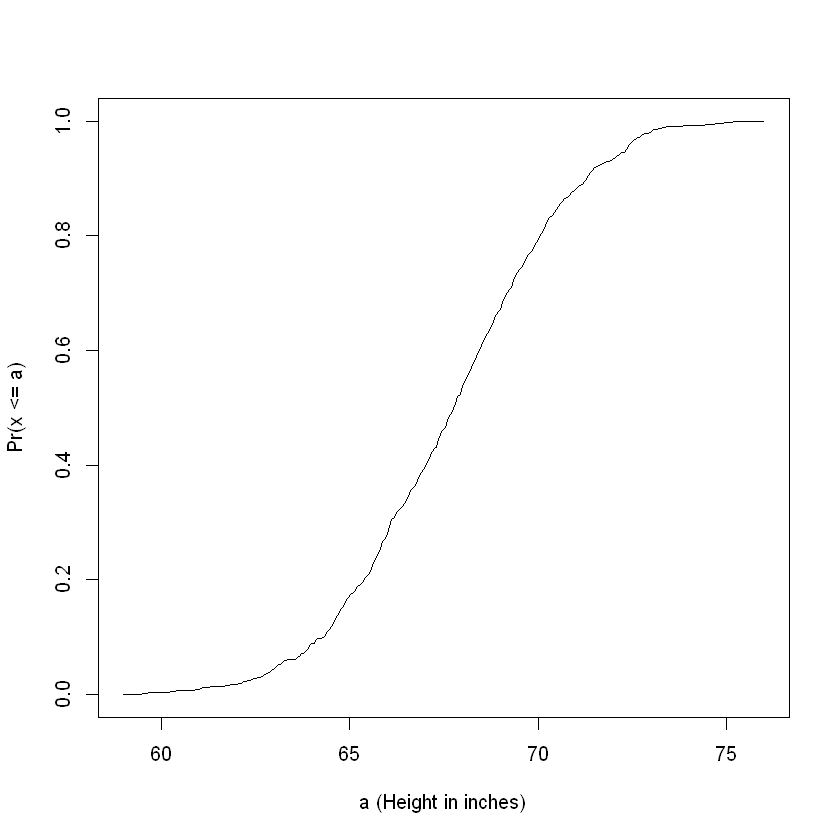

In [51]:
smallest <- floor( min(x))
largest <- ceiling(max(x))
values <- seq(smallest,largest,len=300)
heightedf <- ecdf(x)
plot(values, heightedf(values),type='l', xlab="a (Height in inches)", ylab='Pr(x <= a)')

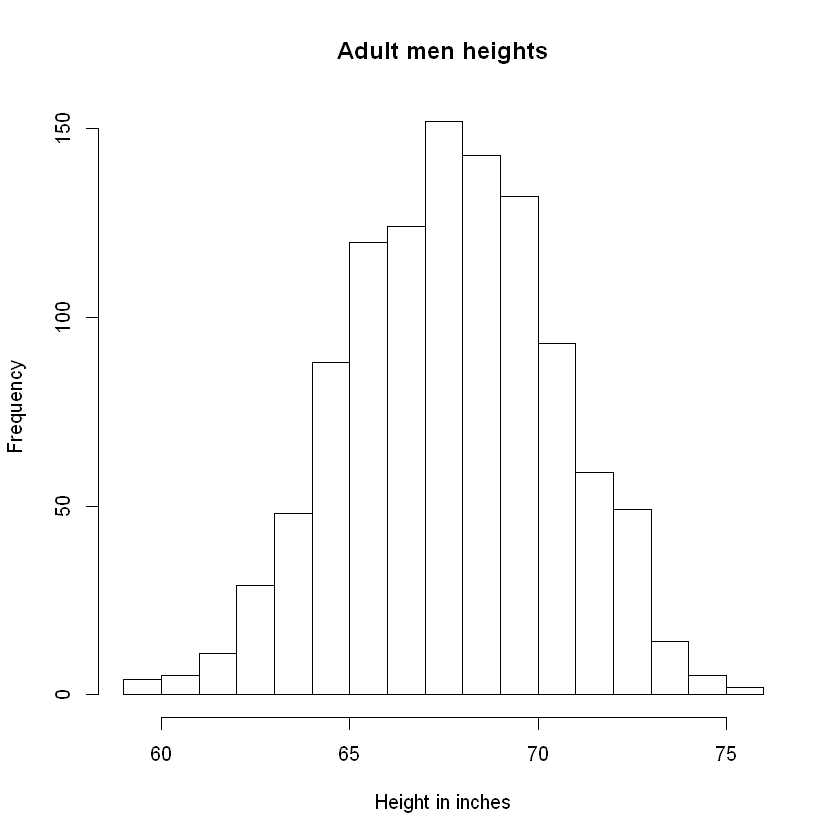

In [52]:
bins <- seq(smallest,largest)
hist(x,breaks=bins,xlab='Height in inches', main='Adult men heights')

In [53]:
#Probability Distribution

In [54]:
# install.packages('rafalib', repos = "http://cran.us.r-project.org")
library(rafalib)

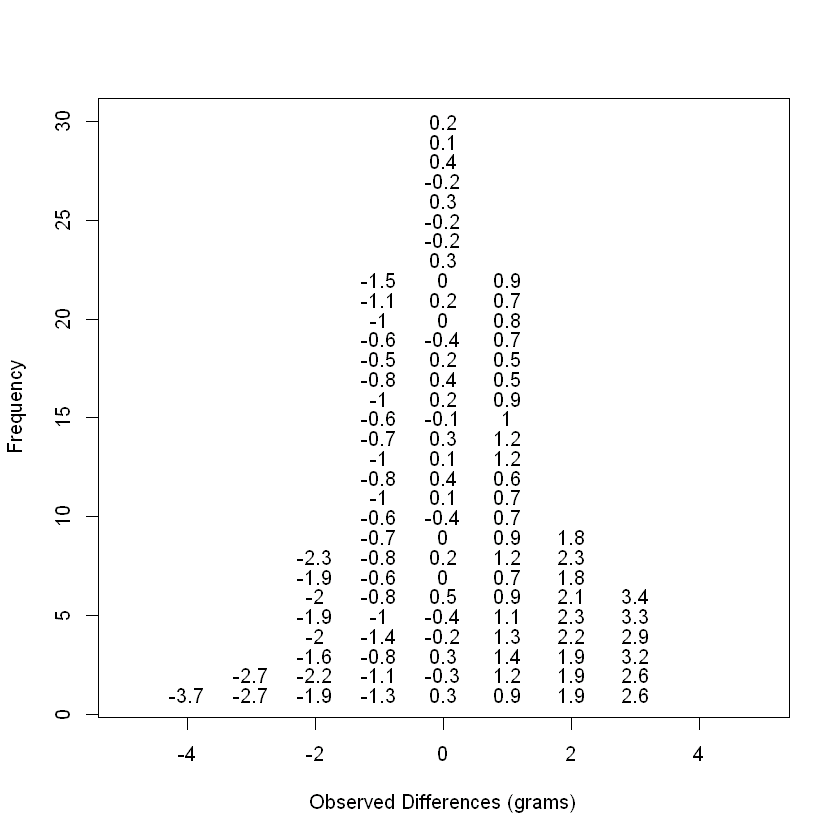

In [55]:
n <- 100
# install.packages('rafalib', repos='repos = "http://cran.us.r-project.org"')
# library(rafalib)
nullplot(-5,5,1,30,xlab='Observed Differences (grams)',ylab='Frequency')
totals <- vector('numeric',11)
for (i in 1:n) {
    control <- sample(population, 12)
    treatment <- sample(population, 12)
    nulldiff <- mean(treatment) - mean(control)
    j <- pmax(pmin(round(nulldiff)+6,11),1)
    totals[j] <- totals[j]+1
    text(j-6,totals[j],pch=15,round(nulldiff,1))
}

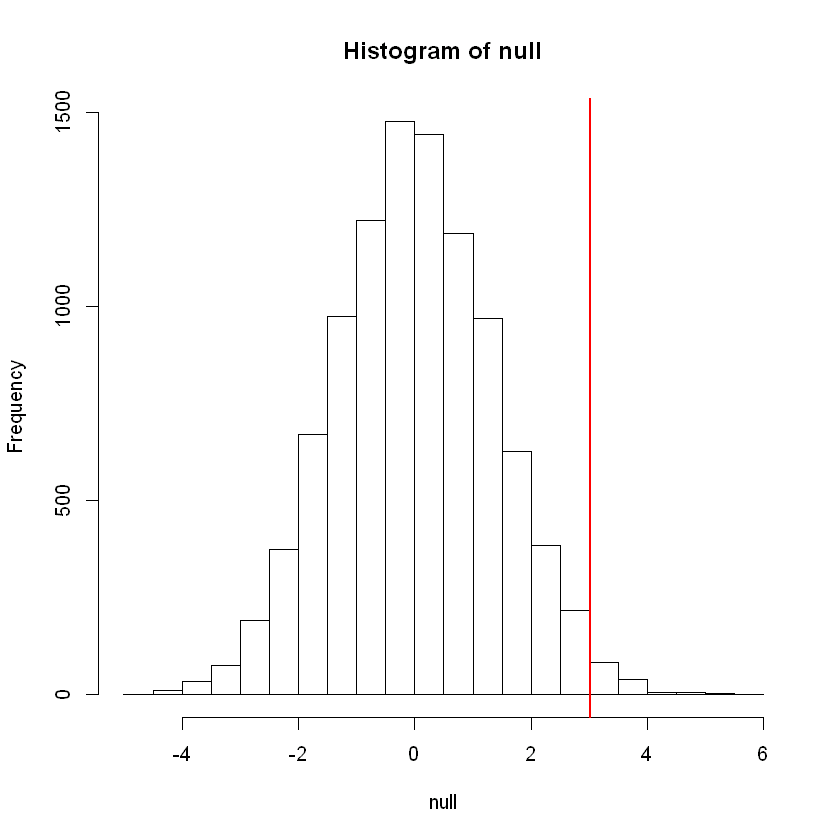

In [56]:
hist(null, freq=TRUE)
abline(v=obsdiff,col='red',lwd=2)

In [57]:
#Normal Distribution
pnorm(obsdiff,mean(null), sd(null))

[1] 0.9867429

In [58]:
library(downloader)

In [59]:
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extd
ata/mice_pheno.csv"

In [60]:
filename <- 'mice_pheno.csv'

In [61]:
download(url, destfile=filename)

In [62]:
dat <- read.csv(filename)

In [73]:
# install.packages('dplyr',repos="http://cran.us.r-project.org")
library(dplyr)

In [74]:
controlPopulation <- filter(dat,Sex=='F' & Diet=='chow') %>% select(Bodyweight) %>% unlist

ERROR: Error in select(., Bodyweight): unused argument (Bodyweight)


In [65]:
length(controlPopulation)

ERROR: Error in eval(expr, envir, enclos): object 'controlPopulation' not found


In [66]:
hfPopulation <- filter(dat,Sex=='F' & Diet=='hf') %>% select(Bodyweight) %>% unlist

ERROR: Error in select(., Bodyweight): unused argument (Bodyweight)


In [67]:
length(hfPopulation)

ERROR: Error in eval(expr, envir, enclos): object 'hfPopulation' not found


In [68]:
#T-distribution

In [69]:
library(rafalib)

In [70]:
mypar(1,2)
hist(hfPopulation)
hist(controlPopulation)

ERROR: Error in hist(hfPopulation): object 'hfPopulation' not found


ERROR: Error in hist(controlPopulation): object 'controlPopulation' not found


In [71]:
mypar(1,2)
qqnorm(hfPopulation)
qqline(hfPopulation)
qqnorm(controlPopulation)
qqline(controlPopulation)

ERROR: Error in qqnorm(hfPopulation): object 'hfPopulation' not found


ERROR: Error in quantile(y, probs, names = FALSE, type = qtype, na.rm = TRUE): object 'hfPopulation' not found


ERROR: Error in qqnorm(controlPopulation): object 'controlPopulation' not found


ERROR: Error in quantile(y, probs, names = FALSE, type = qtype, na.rm = TRUE): object 'controlPopulation' not found
